# Домашнее задание к лекции "Визуализация данных"

## Обязательная часть

Вам необходимо провести базовый [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) выбранного набора данных. 

Требования к анализу:
- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста; 
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

**Откуда брать данные?**

Можете взять свои рабочие данные, либо найти открытые данные (например, на [kaggle.com](https://www.kaggle.com/)) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:
- [данные приложений из Google Play](https://www.kaggle.com/lava18/google-play-store-apps);
- [данные о видео из трендов YouTube](https://www.kaggle.com/datasnaek/youtube-new);
- [данные об уровне счастья в разных странах](https://www.kaggle.com/unsdsn/world-happiness).


In [1]:
import pandas as pd

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

В качестве датасета использован отчет "World Happiness Report" за 2019 год

In [31]:
#увеличим размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [2]:
happiness_df = pd.read_csv('2019.csv')

In [3]:
happiness_df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [29]:
happiness_top_10 = happiness_df[['Country or region','Score']].head(10)

Text(0, 0.5, 'Уровень счастья')

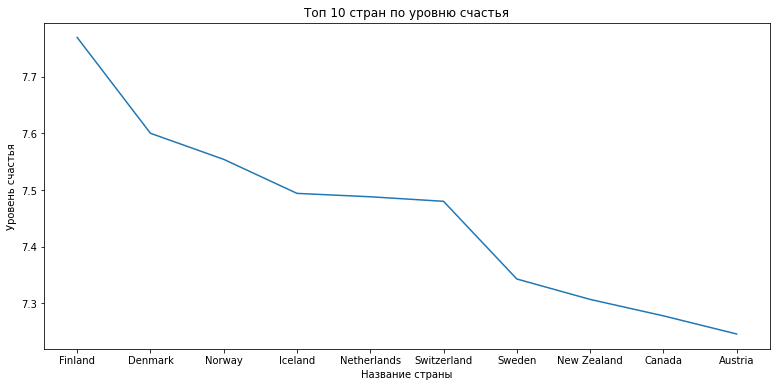

In [40]:
plt.plot(happiness_top_10['Country or region'], happiness_top_10['Score'])
plt.title('Топ 10 стран по уровню счастья')
plt.xlabel('Название страны')
plt.ylabel('Уровень счастья')

Исходя из полученной визуализации, можно сделать предположение, что страны с самым высоким уровнем счастья соредоточены в северной Европе.

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Распределение показателя уровень счастья')

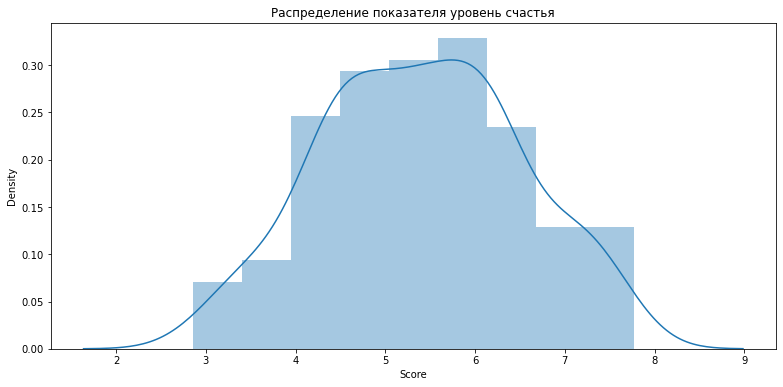

In [39]:
#Проанализируем распределение показателя уровень счастья (Score) с помощью гистограммы.
ax = sns.distplot(happiness_df['Score'])
ax.set_title('Распределение показателя уровень счастья')

Как видно из гистограммы, показатель уровень счастья наиболее часто принимает значения от 4,5 до 6 баллов. Самая распространенная оценка - 6. Исходя из формы гистограммы, можно выдвинуть гипотезу, что показатель уровень счастья имеет нормальное распределение.  

<AxesSubplot:title={'center':'Зависимость уровня счастья от показателя свободы в принятии важных для жизни  решений'}, xlabel='Freedom to make life choices', ylabel='Score'>

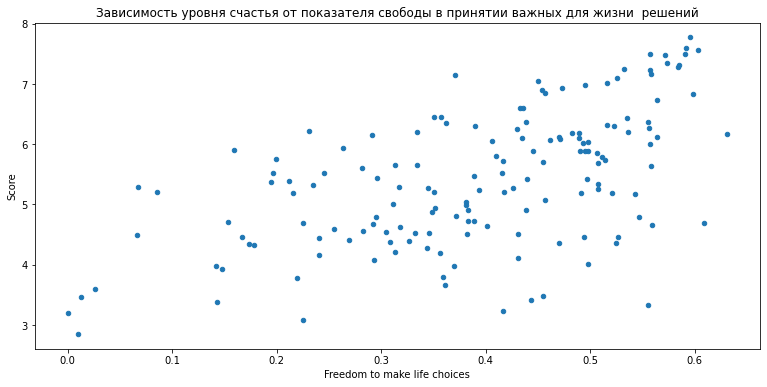

In [45]:
#Проанализаируем зависимость уровня счастья (Score) от показателя свободы принятия важных для жизни  решений (Freedom to make life choices) . Для этого построим точечный график.
happiness_df.plot(kind = 'scatter', x = 'Freedom to make life choices', y = 'Score',title = 'Зависимость уровня счастья от показателя свободы в принятии важных для жизни  решений')

Точечный график показывает, что существует достаточно четкая зависимость между двумя показателями. Чем выше показатель свободы в принятии важных для жизни решений, тем выше показатель уровня счастья. Можно выдвинуть гипотезу, что люди, живущие в старанах, где бОльшая свобода в принятии жизненно важных решений, в среднем более счастливы.

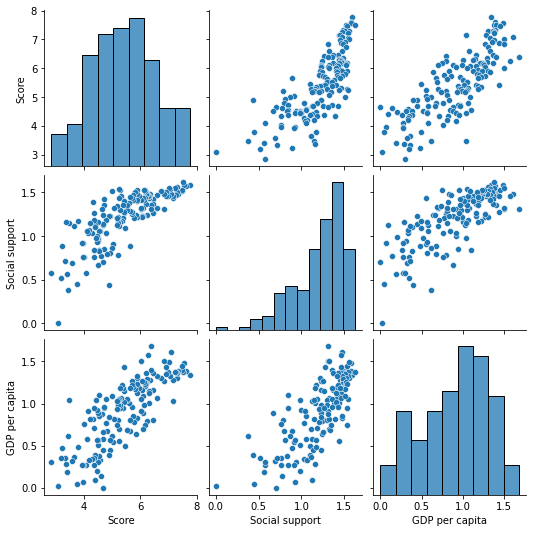

In [47]:
# Проанализируем зависимость уровня счастья (Score) от показателей ВВП на душу населения (GDP per capita) и уровня социальной поддержки(Social support)
sns.pairplot(happiness_df[['Score','Social support','GDP per capita']])

Из визуализации видно, что между тремя показателями существует прямая зависимость. Чем выше социальная поддержка, тем выше уровень счастья, также можно сказать, что чем больше ВВП на душу населения, тем показатель счастья выше. Также можно утверждать, что чем выше ВВП на душу населения, тем выше уровень социальной поддержки. Выдвинем гипотезу, что между показателями уровень счастья и ВВП на душу населения существует прямая линейная зависимость.

### Дополнительная часть (необязательная)

* построить дополнительно не менее 2 визуализаций (итого не менее 6);
* в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;
